In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
star_wars=pd.read_csv('star_wars.csv')
print(star_wars.head(5))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

In [3]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
# create a function to convert few columns to boolean
def yes_no(element):
    yes_no_dic={'Yes':True,'No':False,np.nan:np.nan}
    return yes_no_dic[element]    

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
cols=star_wars.columns[3:9]

In [12]:
values=[]
for col in cols:
    values.append(star_wars[col].unique())
    
values


[array(['Star Wars: Episode I  The Phantom Menace', nan], dtype=object),
 array(['Star Wars: Episode II  Attack of the Clones', nan], dtype=object),
 array(['Star Wars: Episode III  Revenge of the Sith', nan], dtype=object),
 array(['Star Wars: Episode IV  A New Hope', nan], dtype=object),
 array(['Star Wars: Episode V The Empire Strikes Back', nan], dtype=object),
 array(['Star Wars: Episode VI Return of the Jedi', nan], dtype=object)]

In [13]:
dict={'Star Wars: Episode I  The Phantom Menace':True, np.nan:False,
      'Star Wars: Episode II  Attack of the Clones':True,
      'Star Wars: Episode III  Revenge of the Sith':True,
      'Star Wars: Episode IV  A New Hope':True,
      'Star Wars: Episode V The Empire Strikes Back':True,
      'Star Wars: Episode VI Return of the Jedi':True}

In [14]:
# create a function to convert few columns to boolean
def changetoboolean(element):
    dict={'Star Wars: Episode I  The Phantom Menace':True, np.nan:False,
      'Star Wars: Episode II  Attack of the Clones':True,
      'Star Wars: Episode III  Revenge of the Sith':True,
      'Star Wars: Episode IV  A New Hope':True,
      'Star Wars: Episode V The Empire Strikes Back':True,
      'Star Wars: Episode VI Return of the Jedi':True}
    return dict[element]  

In [15]:
for col in cols:
    print(star_wars[col].value_counts(dropna=False))
    star_wars[col]=star_wars[col].map(changetoboolean)
    print(star_wars[col].value_counts(dropna=False))
    

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7

In [16]:
star_wars=star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'Seen_1',
       'Unnamed: 4':'Seen_2', 'Unnamed: 5':'Seen_3', 'Unnamed: 6':'Seen_4', 'Unnamed: 7':'Seen_5', 'Unnamed: 8':'Seen_6'})

In [17]:
cols=star_wars.columns[3:9]
cols


Index(['Seen_1', 'Seen_2', 'Seen_3', 'Seen_4', 'Seen_5', 'Seen_6'], dtype='object')

In [18]:
cols2=star_wars.columns[9:15]
star_wars[cols2]=star_wars[cols2].astype(float)
cols2

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [19]:
#rename columns
star_wars=star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5',
       'Unnamed: 14':'ranking_6'})

In [20]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_1', 'Seen_2', 'Seen_3', 'Seen_4', 'Seen_5', 'Seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

In [21]:
rankingcolumns=[col for col in star_wars.columns if 'ranking' in col]

In [22]:
rankingcolumns


['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

In [23]:
rankingdf=star_wars[rankingcolumns].mean()
rankingdf

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

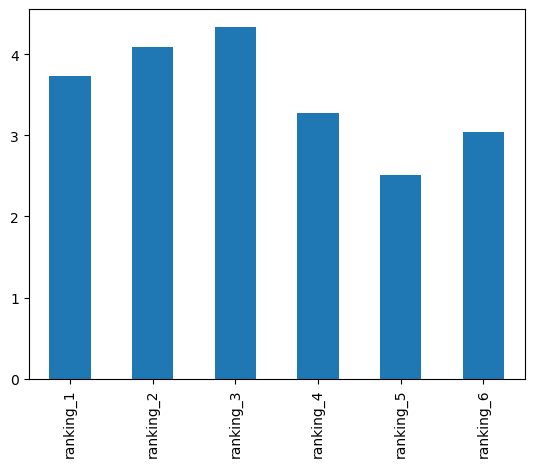

In [24]:
rankingdf.plot.bar()
plt.show()

In [26]:
# Episode 5 seems to be the most favourite and 3 the least based on the mean

In [30]:
seen_columns=[col for col in star_wars.columns if 'Seen' in col]

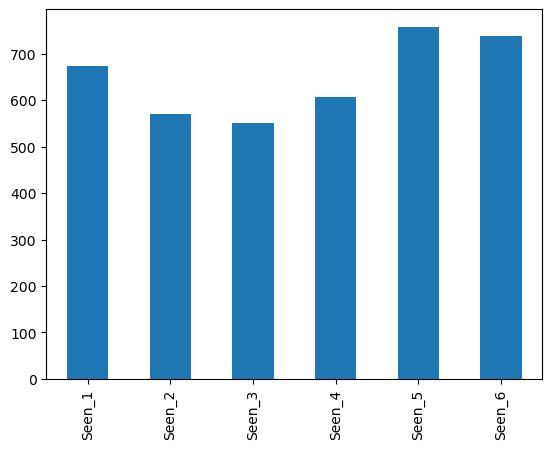

In [32]:
star_wars[seen_columns].sum().plot.bar()
plt.show()

In [33]:
#5 and 6 seem to be the most viewed movies

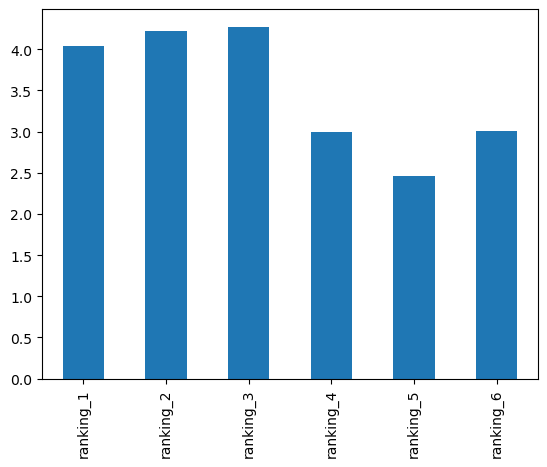

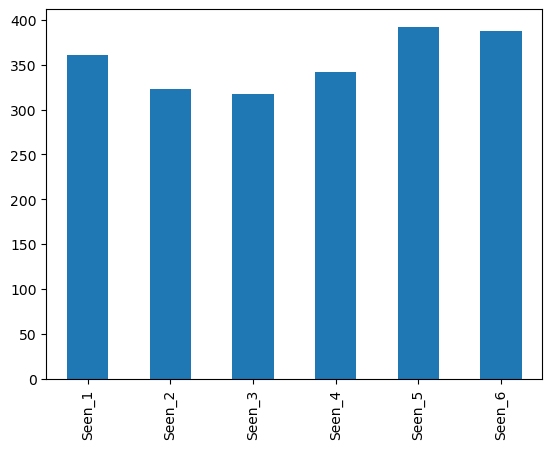

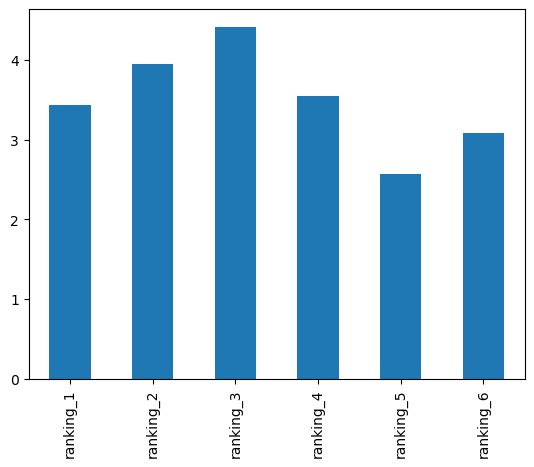

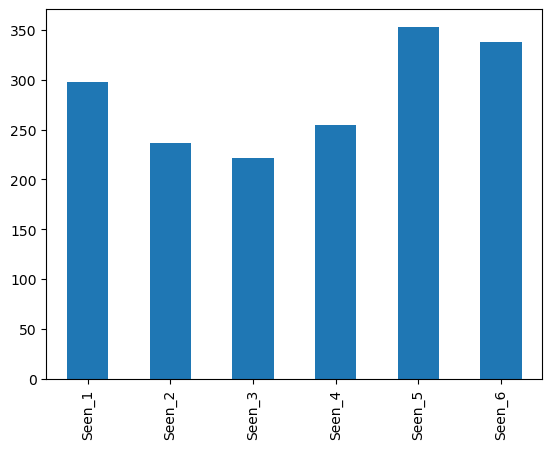

In [40]:
#Analysis on most viewed and highly rated based on gender
male=star_wars[star_wars['Gender']=='Male']
female=star_wars[star_wars['Gender']=='Female']
male[rankingcolumns].mean().plot.bar()
plt.show()
male[seen_columns].sum().plot.bar()
plt.show()
female[rankingcolumns].mean().plot.bar()
plt.show()
female[seen_columns].sum().plot.bar()
plt.show()


In [41]:
#for male population, episode 5 seems to be highest ranked and most viewed
#for female population,teh observation remains the same although the males did see episodes 1-3 more than females

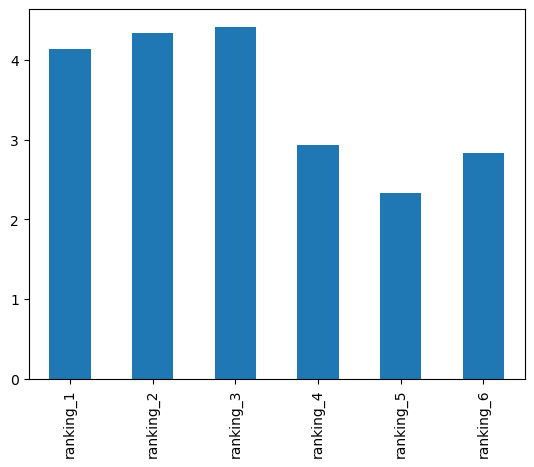

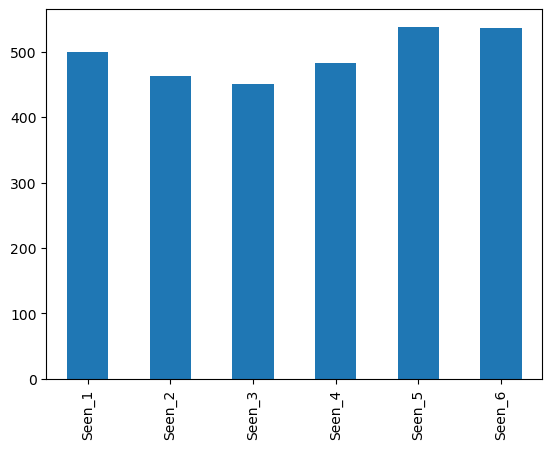

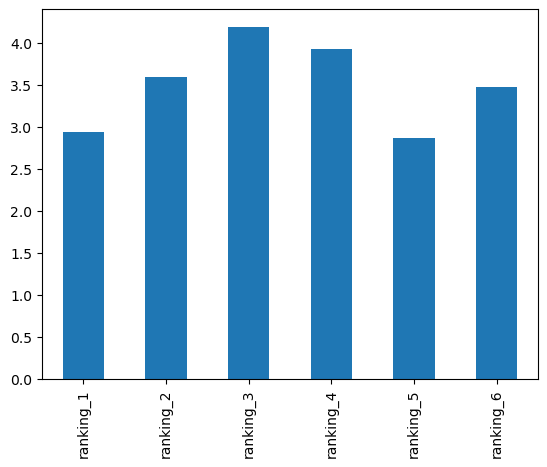

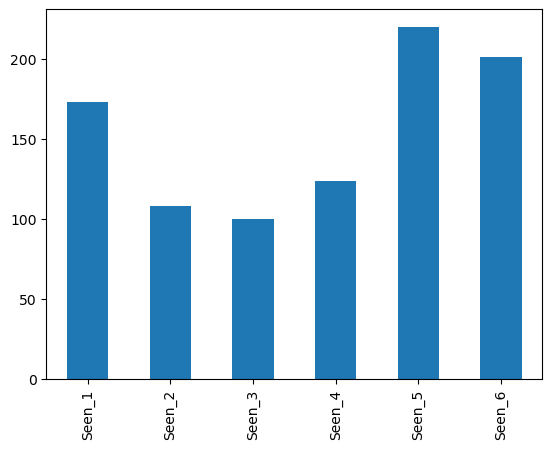

In [42]:
#Analysis on most viewed and highly rated based on whether its fan group or not
fan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
nonfan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]
fan[rankingcolumns].mean().plot.bar()
plt.show()
fan[seen_columns].sum().plot.bar()
plt.show()
nonfan[rankingcolumns].mean().plot.bar()
plt.show()
nonfan[seen_columns].sum().plot.bar()
plt.show()

In [43]:
# As expected teh fan group has seen teh movies far more than the non fan group.
#Episode 5 seems to be most favourite for the fan group and the other group seemed to enjoy episode 1 equally

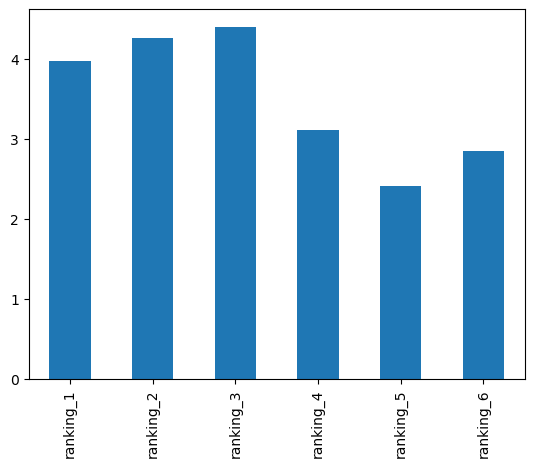

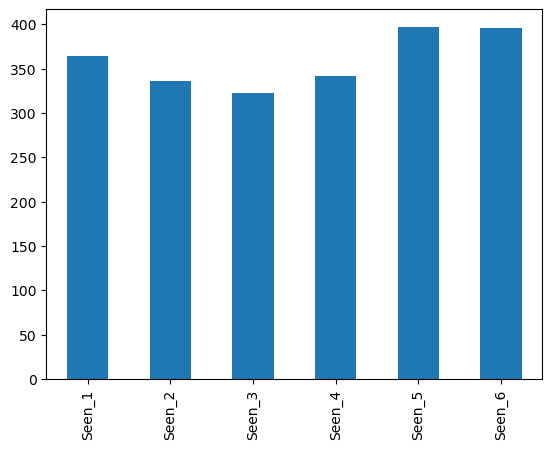

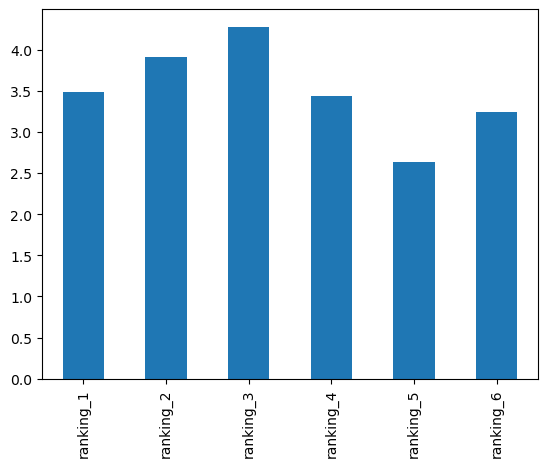

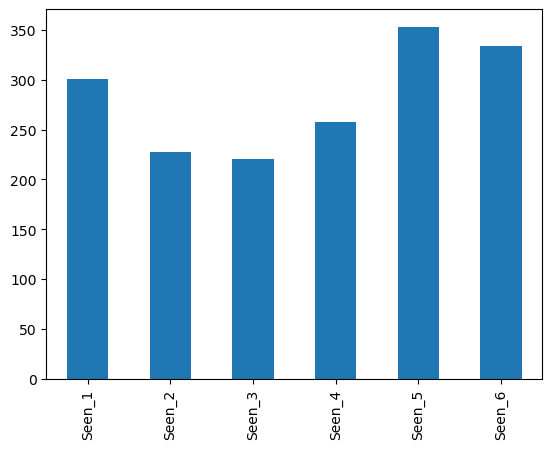

In [44]:
#Analysis on most viewed and highly rated for star Trek fans
trekfan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
treknonfan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']
trekfan[rankingcolumns].mean().plot.bar()
plt.show()
trekfan[seen_columns].sum().plot.bar()
plt.show()
treknonfan[rankingcolumns].mean().plot.bar()
plt.show()
treknonfan[seen_columns].sum().plot.bar()
plt.show()


In [ ]:
#Star Trek fans seem to be fans of 